In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [54]:
df = pd.read_csv("climate_change_indicators.csv")
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


# Data Cleaning

In [58]:
#find how many unique value in each column

column_name = []
unique_value = []
missing_value = []

for column in df.columns:
    column_name.append(column)
    unique_value.append(df[column].nunique())
    missing_value.append(df[column].isnull().sum())  

condition_df = pd.DataFrame({'Column Name': column_name,
                             'Number of unique values': unique_value,
                             'Number of missing values': missing_value,
                                })

condition_df

,Column Name,Number of unique values,Number of missing values
0,ObjectId,225,0
1,Country,225,0
2,ISO2,223,2
3,ISO3,225,0
4,Indicator,1,0
...,...,...,...
67,F2018,200,12
68,F2019,197,12
69,F2020,196,13
70,F2021,198,12


In [60]:
condition_df[condition_df['Number of unique values']== 1]

,Column Name,Number of unique values,Number of missing values
4,Indicator,1,0
5,Unit,1,0
6,Source,1,0
7,CTS_Code,1,0
8,CTS_Name,1,0
9,CTS_Full_Descriptor,1,0


In [61]:
df = df.drop(['Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1)

In [62]:
for i in df.index:
     if pd.isnull(df.loc[i, 'ISO2']):
        df.loc[i,'ISO2'] = df.loc[i, 'ISO3']

In [64]:
#find missing value in each column
#find how many unique value in each column

column_name = []
unique_value = []
missing_value = []
shape = []

for column in df.columns:
    column_name.append(column)
    unique_value.append(df[column].nunique())
    missing_value.append(df[column].isnull().sum())  
    shape.append(df[column].isnull().sum()*100/df.shape[0])

condition_df = pd.DataFrame({'Column Name': column_name,
                             'Number of unique values': unique_value,
                             'Number of missing values': missing_value,
                             'Shape of Missing Data': shape
                                })

condition_df

,Column Name,Number of unique values,Number of missing values,Shape of Missing Data
0,ObjectId,225,0,0.000000
1,Country,225,0,0.000000
2,ISO2,225,0,0.000000
3,ISO3,225,0,0.000000
4,F1961,173,37,16.444444
...,...,...,...,...
61,F2018,200,12,5.333333
62,F2019,197,12,5.333333
63,F2020,196,13,5.777778
64,F2021,198,12,5.333333


In [65]:
condition_df[condition_df.sum(axis=1) > 0]

C:\Users\Ghina Khalda S\AppData\Local\Temp\ipykernel_15864\3867187501.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  condition_df[condition_df.sum(axis=1) > 0]


,Column Name,Number of unique values,Number of missing values,Shape of Missing Data
0,ObjectId,225,0,0.000000
1,Country,225,0,0.000000
2,ISO2,225,0,0.000000
3,ISO3,225,0,0.000000
4,F1961,173,37,16.444444
...,...,...,...,...
61,F2018,200,12,5.333333
62,F2019,197,12,5.333333
63,F2020,196,13,5.777778
64,F2021,198,12,5.333333


In [66]:
condition_df[condition_df['Number of missing values'] > 0]

,Column Name,Number of unique values,Number of missing values,Shape of Missing Data
4,F1961,173,37,16.444444
5,F1962,169,36,16.000000
6,F1963,167,37,16.444444
7,F1964,167,37,16.444444
8,F1965,167,37,16.444444
...,...,...,...,...
61,F2018,200,12,5.333333
62,F2019,197,12,5.333333
63,F2020,196,13,5.777778
64,F2021,198,12,5.333333


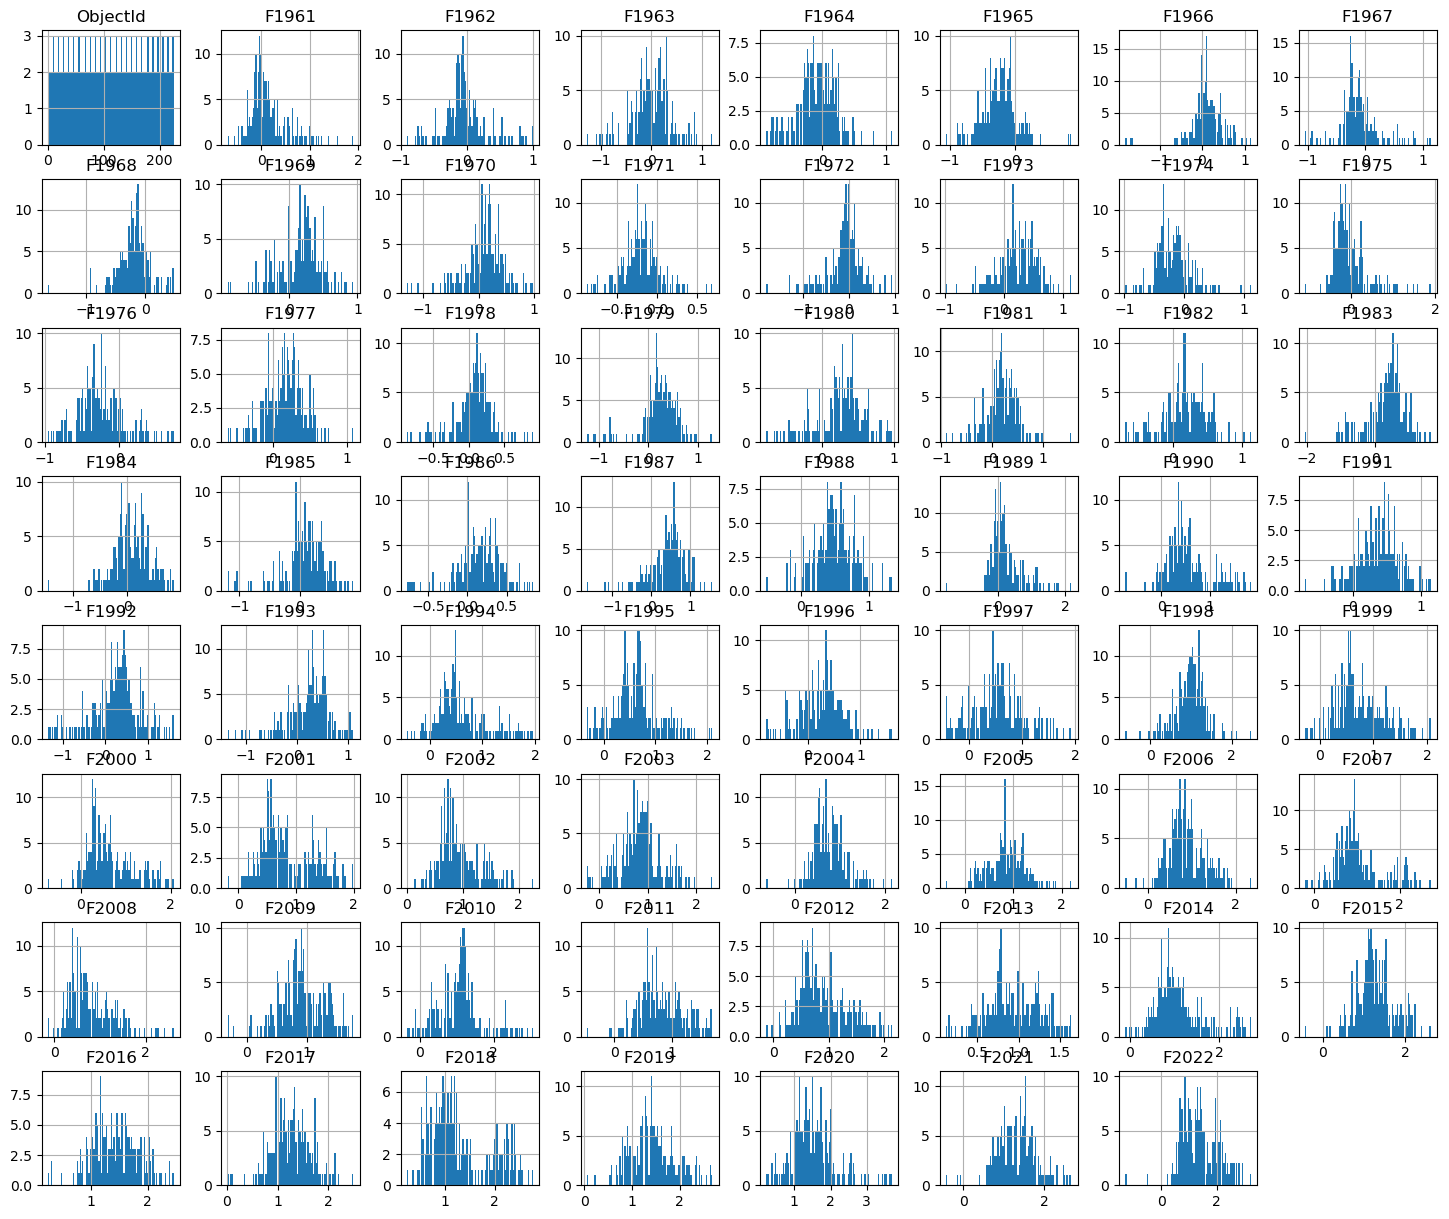

In [10]:
# create histogram to check potential outliers
df.hist(figsize=(18,15), bins=100);

In [11]:
#check to choose median or mean
print(df['F1961'].mean())
print(df['F1961'].max())
print(df['F1961'].min())
print(df['F1961'].median())

0.1630531914893617
1.892
-0.694
0.0645


In [69]:
for j in condition_df[condition_df['Number of missing values'] > 0]['Column Name']:
    for i in df.index:
         if pd.isnull(df.loc[i, j]):
            df.loc[i, j] = df[j].median()

In [70]:
#find missing value in each column
amount_of_null_value = df.isnull().sum()
percentage_of_null_value = amount_of_null_value/df.shape[0] * 100

null_value_df = pd.DataFrame({"columns": amount_of_null_value.keys(),
                              "sum": amount_of_null_value,
                              "percentage": percentage_of_null_value})
null_value_df.reset_index(drop=True, inplace=True)
null_value_df
# null_value_df[null_value_df.sum(axis=1) > 0]

,columns,sum,percentage
0,ObjectId,0,0.0
1,Country,0,0.0
2,ISO2,0,0.0
3,ISO3,0,0.0
4,F1961,0,0.0
...,...,...,...
61,F2018,0,0.0
62,F2019,0,0.0
63,F2020,0,0.0
64,F2021,0,0.0


In [71]:
df.head()

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [72]:
year = []
column_y = []
for i in range(1961, 2017):
    year.append(i)
    column_y.append('F'+str(i))
    
print(year)
print(column_y)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
['F1961', 'F1962', 'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970', 'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978', 'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016']


In [73]:
df

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.4560,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.1980,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.6900,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.1700,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.9460,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,0.632,0.576,0.333,0.819,-0.337,0.284,...,1.423,1.4010,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,WLD,WLD,0.211,0.038,0.168,-0.246,-0.223,0.201,...,1.016,1.0530,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,0.029,-0.009,0.169,-0.251,-0.623,0.089,...,0.897,0.9865,1.215,1.446,1.282,1.125,1.412,1.477,1.327,1.315
223,224,Zambia,ZM,ZMB,0.228,-0.168,-0.390,-0.279,-0.418,0.300,...,0.790,0.9170,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [74]:
df.columns = df.columns.str.replace('F', '')
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

In [75]:
df_new = pd.melt(frame = df, id_vars=['ObjectId', 'Country', 'ISO2', 'ISO3'], var_name='Year', value_name='Value')

In [76]:
df_new['Year'] = df_new['Year'].astype(int)
df_new

,ObjectId,Country,ISO2,ISO3,Year,Value
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,1961,-0.113
1,2,Albania,AL,ALB,1961,0.627
2,3,Algeria,DZ,DZA,1961,0.164
3,4,American Samoa,AS,ASM,1961,0.079
4,5,"Andorra, Principality of",AD,AND,1961,0.736
...,...,...,...,...,...,...
13945,221,Western Sahara,EH,ESH,2022,1.970
13946,222,World,WLD,WLD,2022,1.394
13947,223,"Yemen, Rep. of",YE,YEM,2022,1.315
13948,224,Zambia,ZM,ZMB,2022,0.686


# Data Visualization 

In this visualization, I take the lower value as the top point, while the higher valye as the low point. My plan is visualized data in 2022 from 5 years condition

## Change in Variables

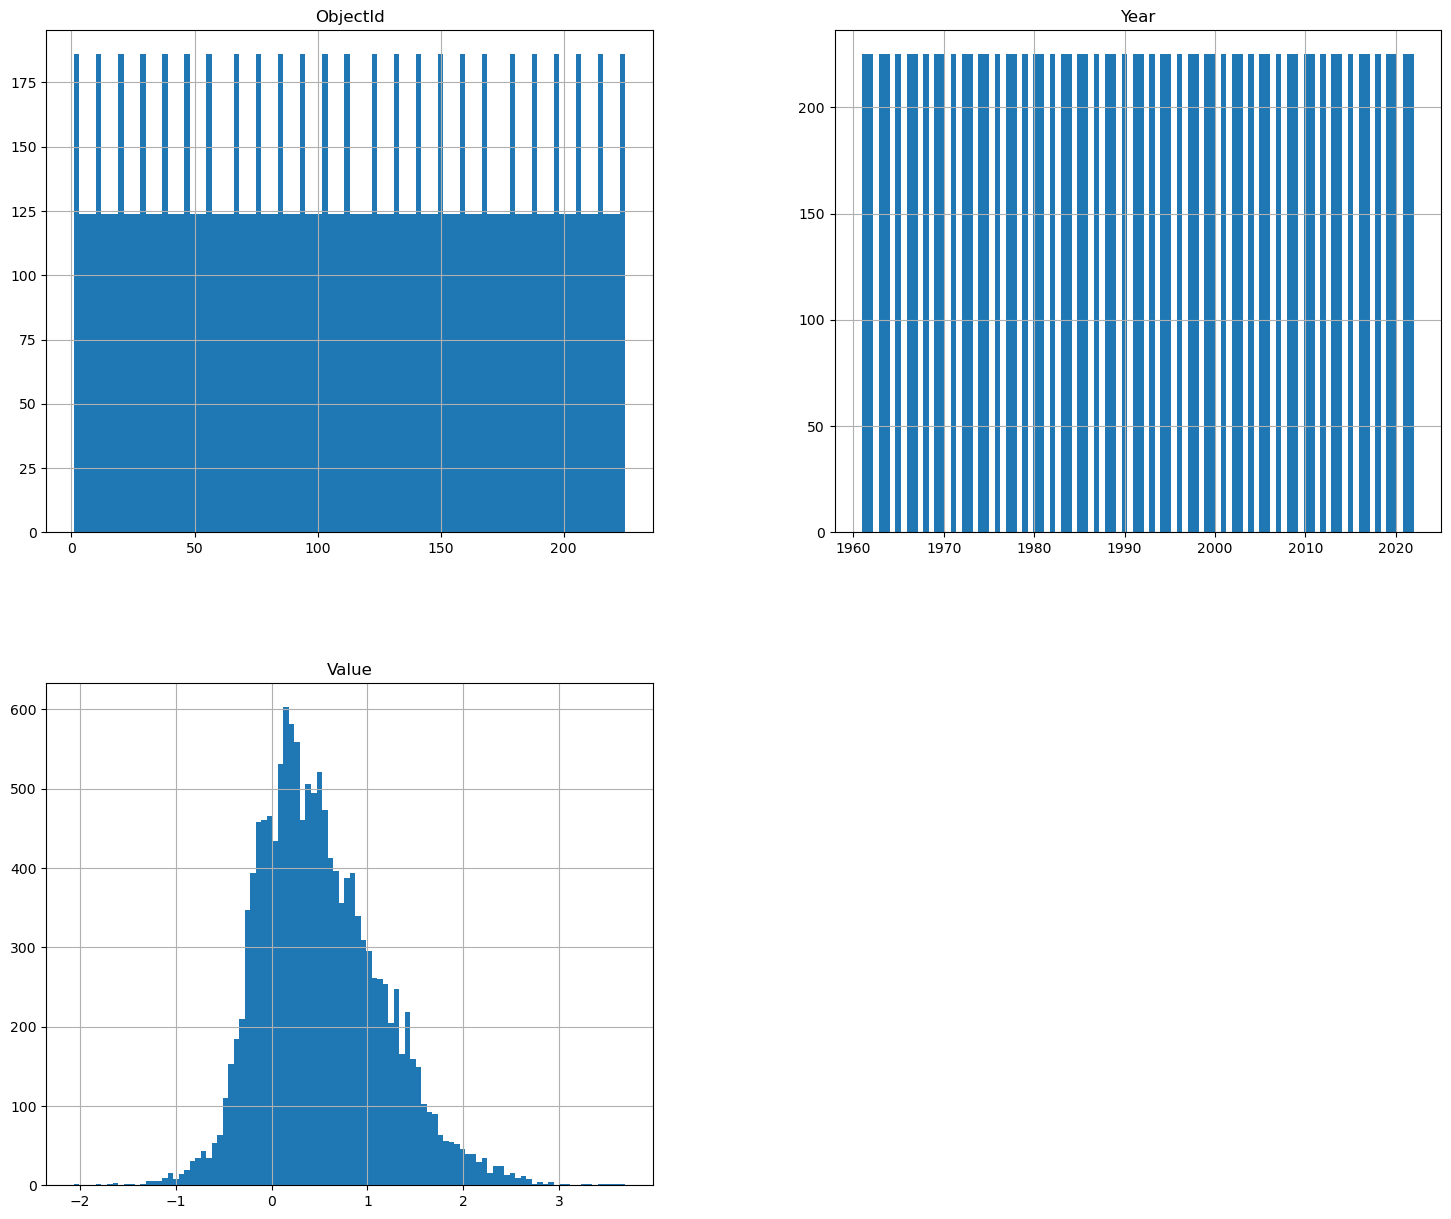

In [20]:
df_new.hist(figsize=(18,15), bins=100);

## Shape of Distribution

C:\Users\Ghina Khalda S\AppData\Local\Temp\ipykernel_15864\233091897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Value'])


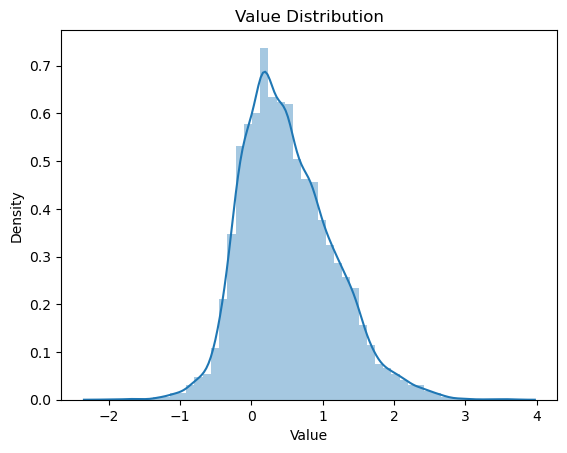

In [21]:
# Quite close to normal distribution
sns.distplot(df_new['Value'])
plt.title('Value Distribution')
plt.show()

Text(0.5, 1.0, 'Probability Plot')

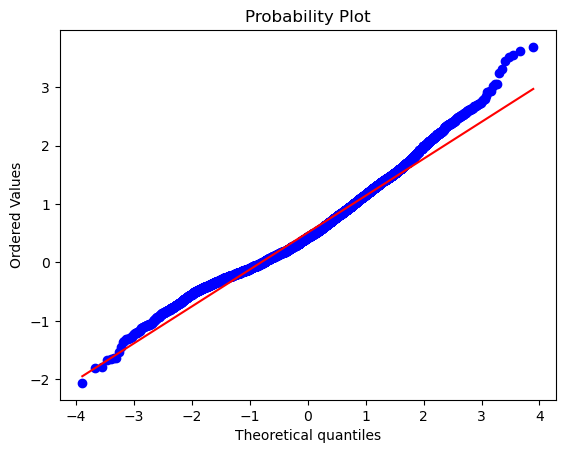

In [22]:
import scipy.stats as stats
stats.probplot(df_new['Value'], plot=plt)
plt.title('Probability Plot')

## Time Series

Plotting will be based from the newest timeline (2022)

### Time Plot

Text(0.5, 1.0, 'General Change of Climate')

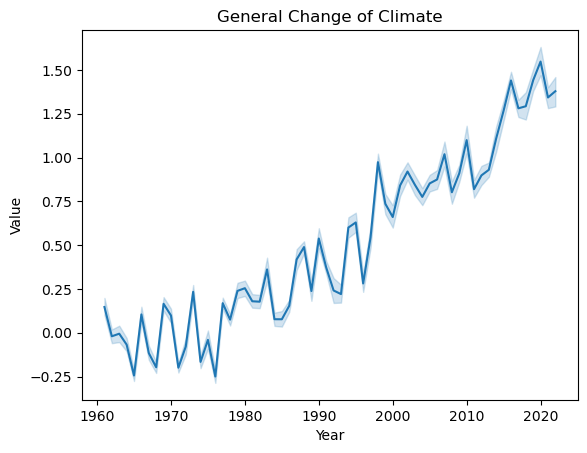

In [23]:
sns.lineplot(data = df_new, x = 'Year', y='Value')
plt.title('General Change of Climate')

Change is fluctuative, but increasing. The pattern seems to be additive seasonality

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

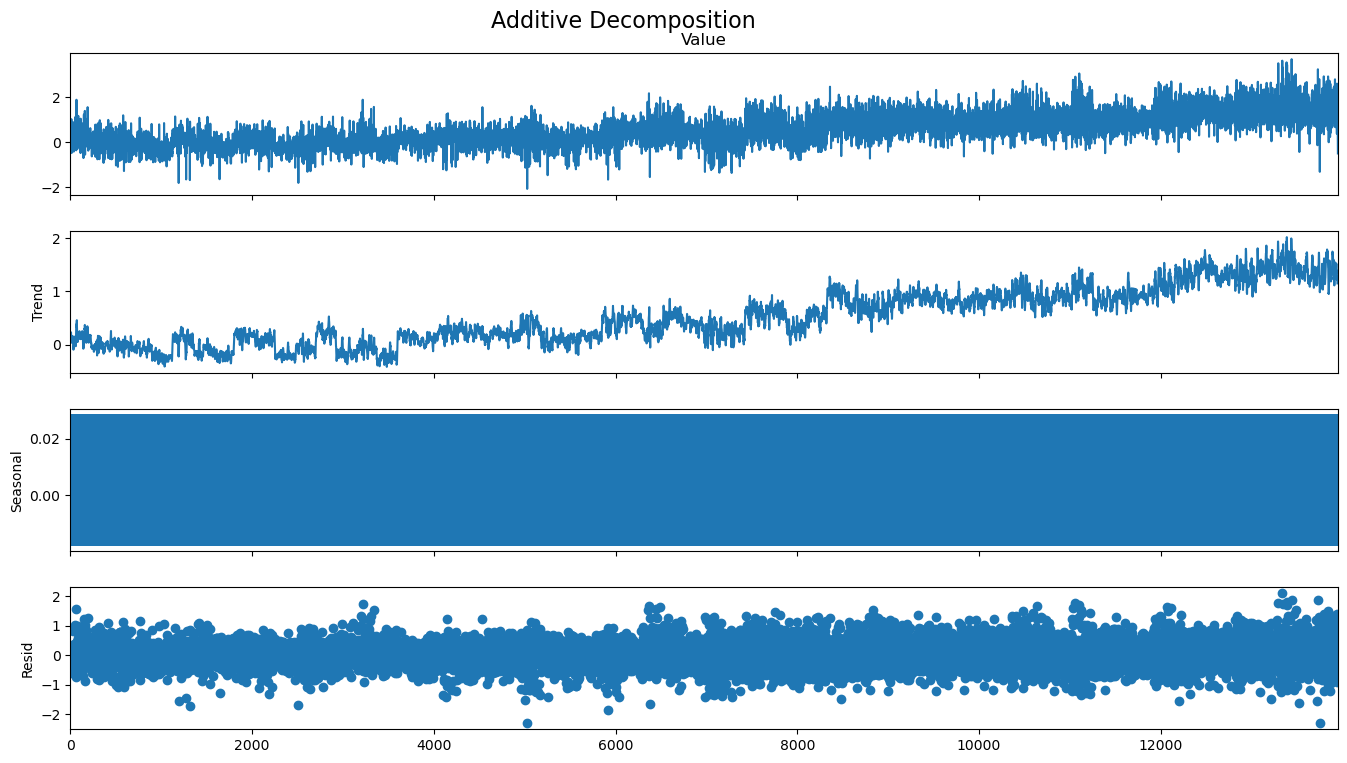

In [50]:
add_decomp = seasonal_decompose(df_new['Value'], model='additive', period=10)

fig = add_decomp.plot()
fig.suptitle('Additive Decomposition', fontsize=16)
fig.set_size_inches(15, 8)

There is some additional structure or pattern in the data that is not captured by the additive components of the model. In this case, I assume that I need to choose specific area to do plotting

In [24]:
df_sorted = df_new[df_new['Year'] == 2022].sort_values(by='Value')
df_sorted.head(5)

,ObjectId,Country,ISO2,ISO3,Year,Value
13750,26,Botswana,BW,BWA,2022,-1.305
13949,225,Zimbabwe,ZW,ZWE,2022,-0.490
13848,124,"Marshall Islands, Rep. of the",MH,MHL,2022,0.007
13863,139,Namibia,NAM,NAM,2022,0.239
13795,71,French Polynesia,PF,PYF,2022,0.359


If the climate change indicator is based on the temperature, the lower the value, the better the quality condition.

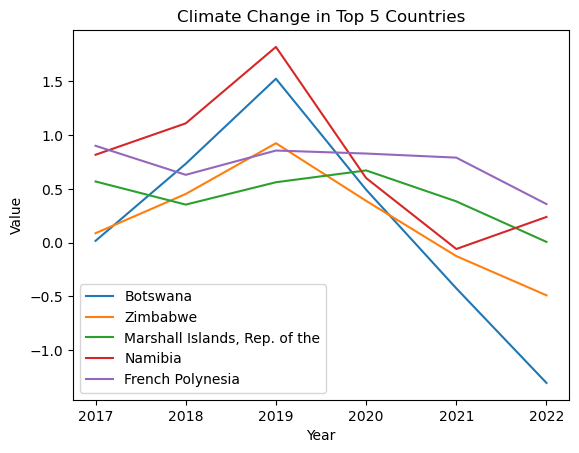

In [25]:
# Top 5 value 
for i in df_sorted.head(5)['Country']:
    country_data = df_new[(df_new['Country'] == i) & (df_new['Year'] >= 2017)]
    sns.lineplot(data=country_data, x = 'Year', y='Value', label = i)
    
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title('Climate Change in Top 5 Countries')
plt.show()

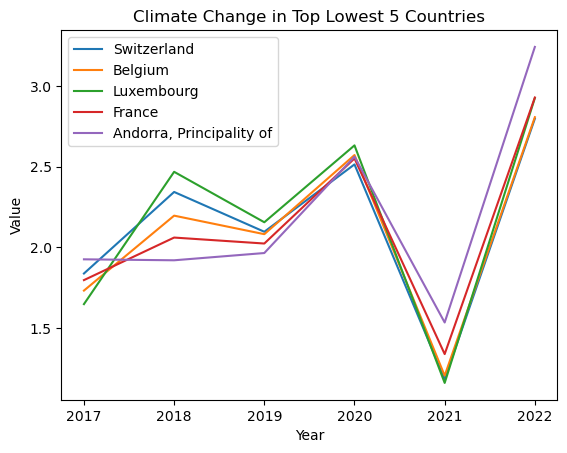

In [26]:
# Top lowest 5 value  
for i in df_sorted.tail(5)['Country']:
    country_data = df_new[(df_new['Country'] == i) & (df_new['Year'] >= 2017)]
    sns.lineplot(data=country_data, x = 'Year', y='Value', label = i)
    
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title('Climate Change in Top Lowest 5 Countries')
plt.show()

The top five countries with the lowest quality have had similar patterns for the last five years, while the top highest-quality has diverse patterns.

### Seasonal Plot

<Axes: xlabel='Year', ylabel='Value'>

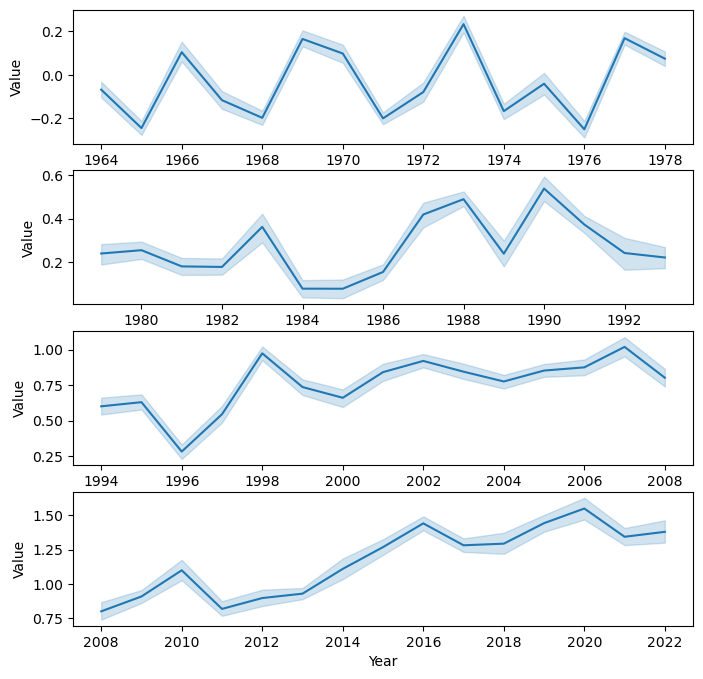

In [36]:
# 15 years range since 1964 
fg, ax = plt.subplots(4, 1, figsize=(8, 8))
sns.lineplot(data = df_new[(df_new['Year'] >= 1964) & (df_new['Year'] <= 1978)], x = 'Year', y='Value', ax = ax[0])
sns.lineplot(data = df_new[(df_new['Year'] >= 1979) & (df_new['Year'] <= 1993)], x = 'Year', y='Value', ax = ax[1])
sns.lineplot(data = df_new[(df_new['Year'] >= 1994) & (df_new['Year'] <= 2008)], x = 'Year', y='Value', ax = ax[2])
sns.lineplot(data = df_new[(df_new['Year'] >= 2008) & (df_new['Year'] <= 2022)], x = 'Year', y='Value', ax = ax[3])

<Axes: xlabel='Year', ylabel='Value'>

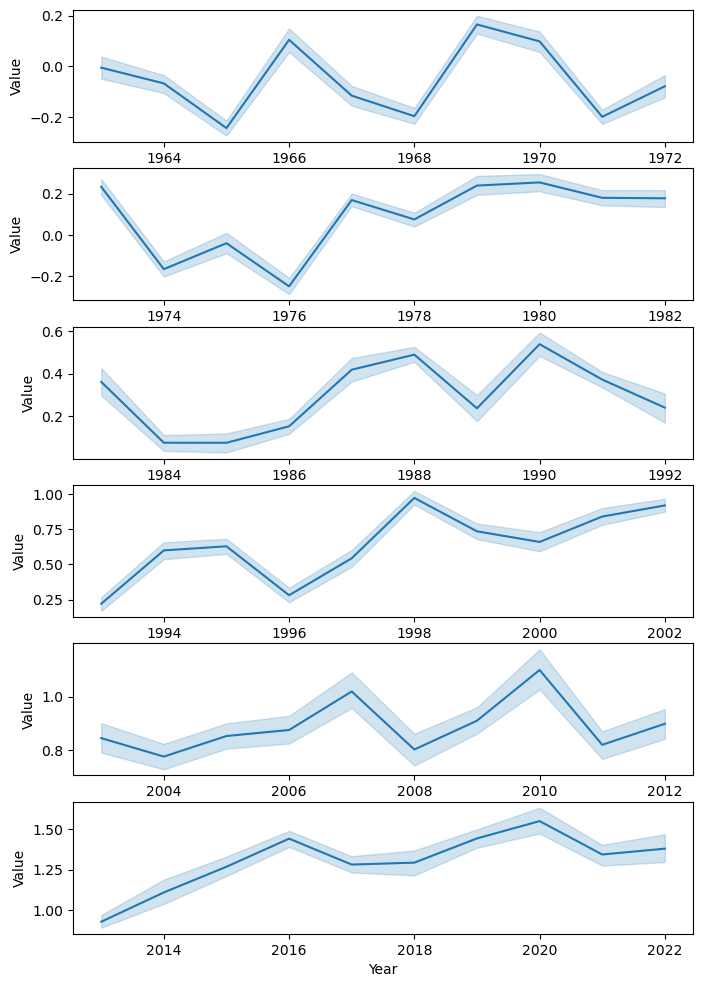

In [39]:
# a decade range since 1963
fg, ax = plt.subplots(6, 1, figsize=(8, 12))
sns.lineplot(data = df_new[(df_new['Year'] >= 1963) & (df_new['Year'] <= 1972)], x = 'Year', y='Value', ax = ax[0])
sns.lineplot(data = df_new[(df_new['Year'] >= 1973) & (df_new['Year'] <= 1982)], x = 'Year', y='Value', ax = ax[1])
sns.lineplot(data = df_new[(df_new['Year'] >= 1983) & (df_new['Year'] <= 1992)], x = 'Year', y='Value', ax = ax[2])
sns.lineplot(data = df_new[(df_new['Year'] >= 1993) & (df_new['Year'] <= 2002)], x = 'Year', y='Value', ax = ax[3])
sns.lineplot(data = df_new[(df_new['Year'] >= 2003) & (df_new['Year'] <= 2012)], x = 'Year', y='Value', ax = ax[4])
sns.lineplot(data = df_new[(df_new['Year'] >= 2013) & (df_new['Year'] <= 2022)], x = 'Year', y='Value', ax = ax[5])

<Axes: xlabel='Year', ylabel='Value'>

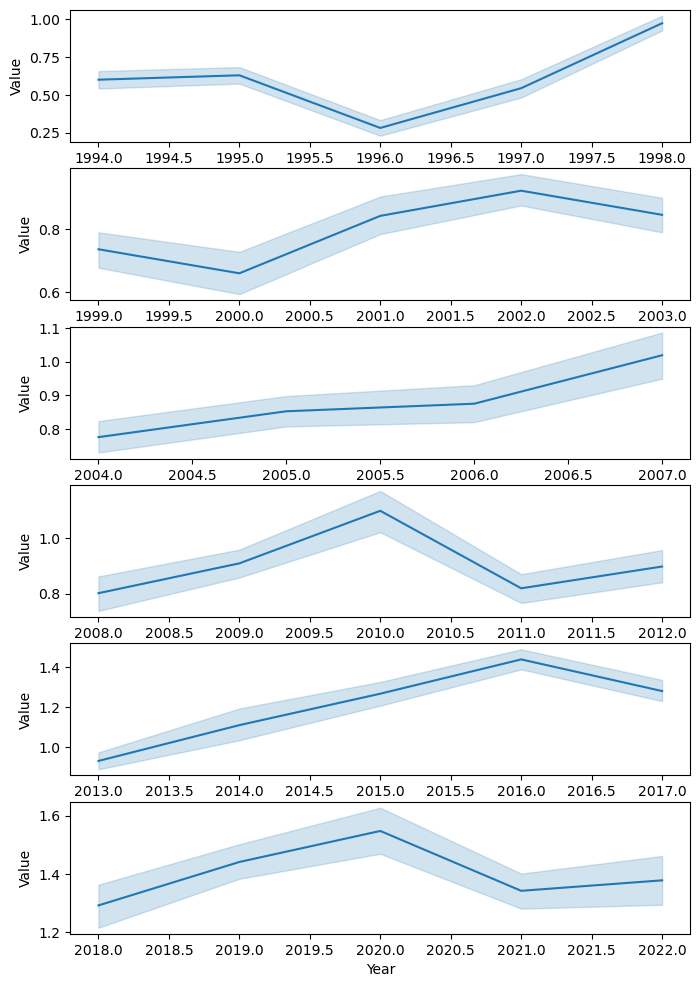

In [40]:
# a 5-year range since 1994
fg, ax = plt.subplots(6, 1, figsize=(8, 12))
sns.lineplot(data = df_new[(df_new['Year'] >= 1994) & (df_new['Year'] <= 1998)], x = 'Year', y='Value', ax = ax[0])
sns.lineplot(data = df_new[(df_new['Year'] >= 1999) & (df_new['Year'] <= 2003)], x = 'Year', y='Value', ax = ax[1])
sns.lineplot(data = df_new[(df_new['Year'] >= 2004) & (df_new['Year'] <= 2007)], x = 'Year', y='Value', ax = ax[2])
sns.lineplot(data = df_new[(df_new['Year'] >= 2008) & (df_new['Year'] <= 2012)], x = 'Year', y='Value', ax = ax[3])
sns.lineplot(data = df_new[(df_new['Year'] >= 2013) & (df_new['Year'] <= 2017)], x = 'Year', y='Value', ax = ax[4])
sns.lineplot(data = df_new[(df_new['Year'] >= 2018) & (df_new['Year'] <= 2022)], x = 'Year', y='Value', ax = ax[5])

Conclusion: No seasonal pattern

### Autocorrelation

In [29]:
from statsmodels.graphics import tsaplots

In [30]:
df_year = df_new.set_index('Year')
df_year.head()

,ObjectId,Country,ISO2,ISO3,Value
Year,,,,,
1961,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113
1961,2,Albania,AL,ALB,0.627
1961,3,Algeria,DZ,DZA,0.164
1961,4,American Samoa,AS,ASM,0.079
1961,5,"Andorra, Principality of",AD,AND,0.736


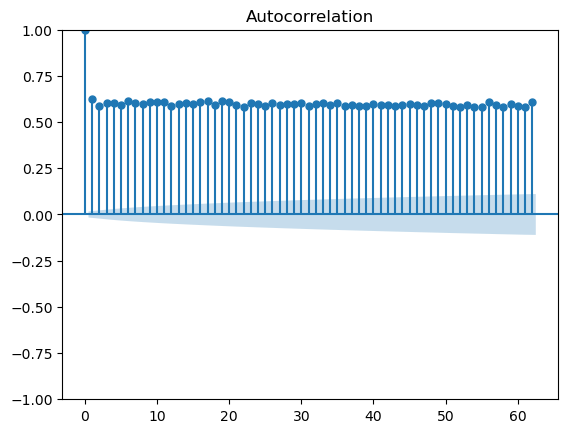

In [43]:
tsaplots.plot_acf(df_year['Value'], lags=62);

If an autocorrelation value goes beyond the confidence interval region, we can assume that the observed autocorrelation value is statistically significant.

Based on the plot, our data is statistically significant and there may be some correlation between observations and lagged observations.

### Partial Autocorrelation

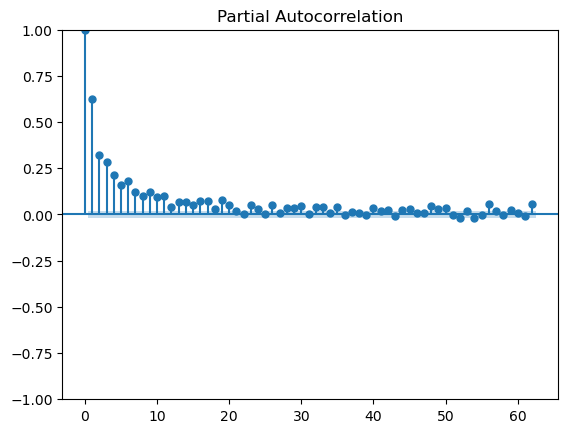

In [44]:
tsaplots.plot_pacf(df_year['Value'], lags=62);

There is significant correlation between the observation t and the lagged observation t-1.